### To Dos :
<ul><li> Build and Implement</li>
    <li> Fit, test, validate</li>
    <li> Doing some EDA can also help</li>
    <li> Improve the model, add more data <\li>
    <li> Add more indicators, anything that correlates to goodle stock prices, alphabet, or number of google searches, or any other trend, interesting would be to see how different trends can affect the google stock prices.<\li>
        <li> Election periods etc, court cases, do some EDA<\li>
</ul>

### Part 1 - Data Preprocessing

Implement LSTM to predict the Google stock prices, preditc the trend. 
LSTMs are supposed to work better than the traditional ARIMA models, let's try and see what we get. 

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

 For feature scaling, we can either do the standardisation or normalization, choice depends on the type of activation function we are using. With sigmoid, mix-max normalization works better.

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Now for the RNN it is important to define the data structure, what all information is gonna be in the memory based on which it will predict the new value.

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(120, 1258):
    X_train.append(training_set_scaled[i-120:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Important to see what new dimension we can add, refer to Keras doc.
It can help predict the output better as there would be some correlation. ex- the case of Apple and Samsung, for predicting Apple's prices, Samsung's price can have an impact as they get their stuff from Samsung.
Adding more indicators can be easily done with reshape.

In [5]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))    

### Part 2 - Building the *RNN*

In [6]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


We use sequential instead of graph with Keras, it is better, and for graph torch is better.

In [7]:
#remember regressor vs. classifier (continous values vs. classes)

# Initialising the RNN
regressor = Sequential()

Choosing the number of memory units is crucial - large number creates a model with high dimensionality, which is important to caputre the trends in a sotck prices kind data.
return_sequences is true for a stacked LSTM, for the last one we don't need to set it, it's false by default.

In [8]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [9]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64))
regressor.add(Dropout(0.2))

In [12]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [13]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1138/1138 [==============================] - 13s 12ms/step - loss: 0.0518
Epoch 2/100
1138/1138 [==============================] - 11s 10ms/step - loss: 0.0059
Epoch 3/100
1138/1138 [==============================] - 11s 9ms/step - loss: 0.0053
Epoch 4/100
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0051
Epoch 5/100
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0044
Epoch 6/100
1138/1138 [==============================] - 12s 10ms/step - loss: 0.0056
Epoch 7/100
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0060
Epoch 8/100
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0042
Epoch 9/100
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0040
Epoch 10/100
1138/1138 [==============================] - 13s 11ms/step - loss: 0.0046
Epoch 11/100
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0036
Epoch 12/100
1138/1138 [==============================] - 9

Epoch 97/100
1138/1138 [==============================] - 9s 8ms/step - loss: 0.0015
Epoch 98/100
1138/1138 [==============================] - 8s 7ms/step - loss: 0.0014
Epoch 99/100
1138/1138 [==============================] - 8s 7ms/step - loss: 0.0014
Epoch 100/100
1138/1138 [==============================] - 9s 8ms/step - loss: 0.0014


### Part 3 - Making preditictions and visualizing

In [17]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [18]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(120, 140):
    X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

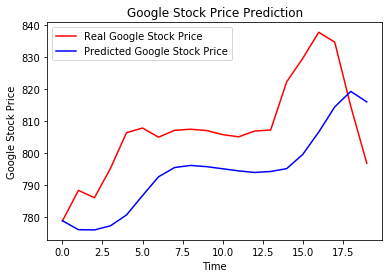

In [19]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Model does not react to fast non linear changes, it follows the upward and downward trend as it detects the smooth transitions.

In [20]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [21]:
rmse

17.609289164933536

In [26]:
mean = np.mean(dataset_train['Open'])

In [27]:
rel_error = (rmse*100/mean)

In [28]:
rel_error

3.299412541023574

### Part 4 - Tuning using GridSearch